# Prolexitim Detector (DProlex v3)
## Binary Classifiers (Alex / NoAlex) using classical and word vector techniques
### Dataset from Prolexitim TAS-20 Spain, Prolexitim NLP and Spanish 3Billion Word2Vec
<hr>
June 2019.<br> Prolexitim dataset version 1.2 (MPGS-TFM-Submission).<br> 
Raúl Arrabales Moreno (Psicobótica / Serendeepia Research)<br>
<a target="_blank" href="http://www.conscious-robots.com/">http://www.conscious-robots.com/</a> <br>
<hr>
Spanish Word Vectors from: <a taget="_blank" href="https://github.com/aitoralmeida/spanish_word2vec">Spanish 3B Pre-trained Word2Vec</a>

**Version ExtraF** (Extra-Features): Using both text and other document features, such as length, sex of author, TAT Card, etc. 

## Load Word Vectors and Documents (texts + labels)
- Word Vectors are obtained from the pre-trained Spanish 3B Word2Vec.
- Documents are obtained from the Prolexitim Pilot Study.
    - Text are narratives from Prolexitim NLP. 
    - Labels are categorical values from Prolexitim TAS-20.


### Loading the word vectors

In [1]:
from gensim.models import KeyedVectors

In [2]:
# My copy of Spanish 3 Billion Word2Vec
word_vectors = KeyedVectors.load('D:\Dropbox-Array2001\Dropbox\DataSets\Spanish Word2Vec\complete.kv', mmap='r')

In [3]:
# Testing Word Vectors for Spanish
word_vectors.most_similar("niño")

[('chiquillo', 0.863490104675293),
 ('bebé', 0.85056471824646),
 ('crío', 0.842483401298523),
 ('muchacho', 0.7765985727310181),
 ('niñito', 0.7588649988174438),
 ('chico', 0.75837242603302),
 ('cachorro', 0.7369438409805298),
 ('muchachito', 0.7227176427841187),
 ('gatito', 0.6718686819076538),
 ('hombre', 0.6658662557601929)]

In [4]:
# Testing Word Vectors for Spanish
# word_vectors.get_vector("niño")

In [5]:
# Testing Word Vectors for Spanish
# word_vectors.similar_by_vector(word_vectors.get_vector("niño") - word_vectors.get_vector("niña"))

### Loading Prolexitim TAS-20 + NLP Dataset Load

In [6]:
import pandas as pd 

In [7]:
# My copy of Prolexitim join tables with TAS-20 categorical label and narratives from Prolexitim NLP
tasnlp_dataset_path = "D:\\Dropbox-Array2001\\Dropbox\\UNI\\MPGS\\2_TFM\\Datos\\prolexitim-merged-1.3.csv"

In [8]:
data_df = pd.read_csv(tasnlp_dataset_path,header=0,delimiter="\t")

In [9]:
data_df.head(n=2)

,RowId,code,card,hum,mode,time,G-score,G-magnitude,Azure-TA,Text,...,SClass,Siblings,SibPos,Origin,Resid,Rtime,Ethnic,Job,alex-a,alex-b
0,1,b7adde8a9eec8ce92b5ee0507ce054a4,13V,1,T,200000,-0.2,0.2,0.62,Era un niño pensando en el granero pensando a ...,...,2.0,5.0,3.0,ES,ES,-1.0,Iberic,Manager,NoAlex,NoAlex
1,2,b7adde8a9eec8ce92b5ee0507ce054a4,18NM,2,T,200000,-0.5,0.5,0.41,"Una madre que está consolando a su hijo, despu...",...,2.0,5.0,3.0,ES,ES,-1.0,Iberic,Manager,NoAlex,NoAlex


In [10]:
data_df = data_df.dropna()

### Retrieving non-text features

In [11]:
# data_df.dtypes

In [12]:
# data_df.groupby('Sex').describe()

In [13]:
# Sex is represented by a float but is a categorical
map_dict = {1.0: "male", 2.0: "female"}
data_df['Sex'] = data_df['Sex'].map(map_dict)

In [14]:
# data_df.groupby('Sex').describe()

In [15]:
# data_df.groupby('card').count()

In [16]:
# Only these four TAT cards have enough representation
data_df = data_df[(data_df['card'] == '1') | 
                  (data_df['card'] == '11') |
                  (data_df['card'] == '13HM') |
                  (data_df['card'] == '9VH')]

In [17]:
data_df.groupby('card').count()

,RowId,code,hum,mode,time,G-score,G-magnitude,Azure-TA,Text,Text-EN,...,SClass,Siblings,SibPos,Origin,Resid,Rtime,Ethnic,Job,alex-a,alex-b
card,,,,,,,,,,,,,,,,,,,,,
1,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
11,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
13HM,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
9VH,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69


In [18]:
data_df.groupby('Age').count()

,RowId,code,card,hum,mode,time,G-score,G-magnitude,Azure-TA,Text,...,SClass,Siblings,SibPos,Origin,Resid,Rtime,Ethnic,Job,alex-a,alex-b
Age,,,,,,,,,,,,,,,,,,,,,
13.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
18.0,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
21.0,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
22.0,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
23.0,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
24.0,17,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
25.0,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
26.0,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
27.0,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


### Check text (lenguage) features and label

In [19]:
data_df[['Text','alex-a']].sample(n=6)

,Text,alex-a
41,Esto es una historia muy bonita porque se han ...,NoAlex
205,"El doctor solo pudo certificar su muerte, esta...",NoAlex
253,"La desesperación, por no pensar en una histori...",PosAlex
178,un niño que su único amigo era un violín. Much...,PosAlex
152,Érase una vez... unos caballeros que volvían d...,Alex
155,Un grupo de hombres homosexuales felices en un...,NoAlex


In [20]:
# We have a very unbalance dataset
data_df.groupby(by='alex-a').count()

,RowId,code,card,hum,mode,time,G-score,G-magnitude,Azure-TA,Text,...,Studies,SClass,Siblings,SibPos,Origin,Resid,Rtime,Ethnic,Job,alex-b
alex-a,,,,,,,,,,,,,,,,,,,,,
Alex,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
NoAlex,202,202,202,202,202,202,202,202,202,202,...,202,202,202,202,202,202,202,202,202,202
PosAlex,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40


In [21]:
# And we decided to consider both Possible Alexithymia and Alexithymia as the same (Positive) class
data_df['alex-a'] = data_df['alex-a'].apply(lambda x: x.replace('PosAlex', 'Alex'))

In [22]:
data_df.groupby(by='alex-a').count()

,RowId,code,card,hum,mode,time,G-score,G-magnitude,Azure-TA,Text,...,Studies,SClass,Siblings,SibPos,Origin,Resid,Rtime,Ethnic,Job,alex-b
alex-a,,,,,,,,,,,,,,,,,,,,,
Alex,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
NoAlex,202,202,202,202,202,202,202,202,202,202,...,202,202,202,202,202,202,202,202,202,202


## Prepare training data set
- X (independent variable) --> Text (narrative in Spanish), Card (stimuli), Demographics
- y (dependent variable) --> Alexithymia label (Alex/NoAlex)

In [23]:
import numpy as np

In [24]:
# Remove the label (y) from X df
X = data_df.drop('alex-a', axis=1)

In [25]:
# Our target is alex-a (as numpy array)
y = data_df['alex-a'].values

In [26]:
print ("Number of examples: %s" % len(y))

Number of examples: 271


## Evaluation Metrics definition

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_auc_score

In [28]:
# Precision detecting the presencen of alexithymia
alex_precision_scorer = make_scorer(precision_score, pos_label='Alex')

# Precision detecting the absence of alexithymia
noalex_precision_scorer = make_scorer(precision_score, pos_label='NoAlex')

# sensitivity for the presence of alexithymia: recall, hit rate, or true positive rate (TPR).
alex_recall_scorer = make_scorer(recall_score, pos_label='Alex')

# sensitivity for the absence of alexithymia: recall, hit rate, or true positive rate (TPR).
noalex_recall_scorer = make_scorer(recall_score, pos_label='NoAlex')

# F1 Score the presence of alexithymia: harmonic mean of precision and sensitivity.
alex_f1_scorer = make_scorer(f1_score, pos_label='Alex')

# F1 Score the absence of alexithymia: harmonic mean of precision and sensitivity.
noalex_f1_scorer = make_scorer(f1_score, pos_label='NoAlex')

In [29]:
# A dataframe to store all evaluation results
col_names =  ['ModelName', 'ShortName', 'Accuracy', 'AUC', 'AlexPrecision', 'NoAlexPrecision', 'AlexRecall', 'NoAlexRecall', 'AlexF1', 'NoAlexF1']
eval_df  = pd.DataFrame(columns = col_names)
eval_df

,ModelName,ShortName,Accuracy,AUC,AlexPrecision,NoAlexPrecision,AlexRecall,NoAlexRecall,AlexF1,NoAlexF1


## Evaluation helper functions

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

In [31]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['Alex','NoAlex']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Feature Vector Preprocessing Classes

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

In [33]:
# Custom Transformer that extracts columns passed as argument to its constructor 
class FeatureSelector( BaseEstimator, TransformerMixin ):

    # Class Constructor 
    def __init__( self, feature_names ):
        self._feature_names = feature_names 
    
    # Return self nothing else to do here    
    def fit( self, X, y = None ):
        return self 
    
    # Method that describes what we need this transformer to do
    def transform( self, X, y = None ):
        return X[self._feature_names].values 

In [34]:
# Custom transformer that gets the TAT card used to generate the text
class CardTransformer( BaseEstimator, TransformerMixin ):

    # Return self nothing else to do here
    def fit( self, X, y = None  ):
        return self
    
    # Transformer method we wrote for this transformer 
    def transform(self, X , y = None ):
        # Convert the column to binary for one-hot-encoding later
        # X.loc[:,'card'] = X['card'].apply( self.create_binary )
        
        #returns numpy array
        return X.values

In [35]:
# Custom transformer that gets the Sex of the participant
class DemoCategoricalTransformer( BaseEstimator, TransformerMixin ):

    # Return self nothing else to do here
    def fit( self, X, y = None  ):
        return self
    
    # Transformer method we wrote for this transformer 
    def transform(self, X , y = None ):
        # Convert the column to binary for one-hot-encoding later
        # X.loc[:,'Sex'] = X['Sex'].apply( self.create_binary )
        
        #returns numpy array
        return X

In [36]:
# Custom transformer that gets the Sex of the participant
class DemoNumericalTransformer( BaseEstimator, TransformerMixin ):

    # Return self nothing else to do here
    def fit( self, X, y = None  ):
        return self
    
    # Transformer method we wrote for this transformer 
    def transform(self, X , y = None ):
        return X.values 

In [37]:
# Custom transformer to extract ad hoc features from text
class TextStats(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):
        return self

    def transform(self, X , y = None):
        return [{'length': len(text),
                 'num_sentences': text.count('.')}
                for text in X]

In [38]:
# Custom transformer to build a mean doc vector from word vectors
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        if len(word2vec.index2word)>0:
            self.dim=len(word2vec.index2word)
        else:
            self.dim=0
            
    def fit(self, X, y):
        return self 

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec.vocab] 
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

### Sets of feaures

In [39]:
# TAT Card features 
card_features = ['card']

# TEXT features 
text_features = ['Text']

# Demographics categrorical features
demographic_cat_features = ['Sex']

# Demographics numerical features
demographic_num_features = ['Age','es-len']

### Pre-processing pipelines (to be executed in parallel)

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [41]:
# Defining the steps in the TAT Card categorical pipeline 
card_pipeline = Pipeline( steps = [('categorical_selector', FeatureSelector(card_features)),
                                   #('card_transformer', CardTransformer()), 
                                   ('one_hot_encoder', OneHotEncoder(sparse=False))])

In [42]:
# Defining the steps in the demographics categorical pipeline 
demo_cat_pipeline = Pipeline( steps = [('demo_categorical_selector', FeatureSelector(demographic_cat_features)),
                                       ('demo_cat_transformer', DemoCategoricalTransformer()), 
                                       ('one_hot_encoder', OneHotEncoder(sparse=False))])

In [43]:
# Defining the steps in the demographics numerical pipeline 
demo_num_pipeline = Pipeline( steps = [('demo_numerical_selector', FeatureSelector(demographic_num_features)),
                                       ('scaler', MinMaxScaler())])

In [44]:
# Defining the steps in the ad hoc text feature extraction pipeline 
text_adhoc_pipeline = Pipeline( steps = [('text_selector', FeatureSelector(text_features)),
                                         ('text_stats', TextStats()), 
                                         ('vect', DictVectorizer())])

In [45]:
# Defining the steps in the text WC feature extraction pipeline 
text_wc_pipeline = Pipeline( steps = [('text_selector', FeatureSelector(text_features)),
                                      ('count_vectorizer', CountVectorizer(analyzer=lambda x: x))])

In [46]:
# Defining the steps in the text TF/IDF feature extraction pipeline 
text_tfidf_pipeline = Pipeline( steps = [('text_selector', FeatureSelector(text_features)),
                                         ('tfidf_vectorizer', TfidfVectorizer(analyzer=lambda x: x))])

In [47]:
# Defining the steps in the text TF/IDF feature extraction pipeline 
text_wc_tfidf_pipeline = Pipeline( steps = [('text_selector', FeatureSelector(text_features)),
                                            ('count_vectorizer', CountVectorizer(analyzer=lambda x: x)),
                                            ('tfidf_transformer', TfidfTransformer())])

In [48]:
# Defining the steps in the text Word2Vec feature extraction pipeline 
text_doc2vec_pipeline = Pipeline( steps = [('text_selector', FeatureSelector(text_features)),
                                           ('mean_w2v_vectorizer', MeanEmbeddingVectorizer(word_vectors))]) 

In [49]:
# FULL PRE-PROCESSING PIPELINES

# Classical Machine Learning - NLP approach
prepro_ml_pipeline = FeatureUnion(transformer_list=[
    ('card_pipeline', card_pipeline), 
    ('demo_cat_pipeline', demo_cat_pipeline),
    ('demo_num_pipeline', demo_num_pipeline),
    ('text_wc_tfidf_pipeline', text_wc_tfidf_pipeline)],
        
    # weight components in FeatureUnion
    transformer_weights={
        'card_pipeline': 1.0,
        'demo_cat_pipeline': 1.0,
        'demo_num_pipeline': 1.0,
        'text_wc_tfidf_pipeline': 1.0
        })

# Using pre-trained word embeddings
prepro_dl_pipeline = FeatureUnion(transformer_list=[
    ('card_pipeline', card_pipeline), 
    ('demo_cat_pipeline', demo_cat_pipeline),
    ('demo_num_pipeline', demo_num_pipeline),
    ('text_doc2vec_pipeline', text_doc2vec_pipeline)],
                                 
    # weight components in FeatureUnion
    transformer_weights={
        'card_pipeline': 1.0,
        'demo_cat_pipeline': 1.0,
        'demo_num_pipeline': 1.0,
        'text_doc2vec_pipeline': 1.0
        })

In [50]:

prepro_test5_pipeline = FeatureUnion(transformer_list=[
    ('card_pipeline', card_pipeline), 
    ('demo_cat_pipeline', demo_cat_pipeline),
    ('demo_num_pipeline', demo_num_pipeline),
    ('text_tfidf_pipeline', text_tfidf_pipeline)])

## Classifier with TF/IDF and Multinomial Naive Bayes
Multinomial Naive Bayes works with ocurrence counts, therefore we use here a feature vector with word counts for each document. 
- X: Vectors with word counts, TF/IDF, demographics, and card.
- y: Alexithymia label.

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [69]:
# Multinomial Naive Bayes using TF/IDF
multi_nb_pipe = Pipeline( steps = [('prepro_ml_pipeline', prepro_ml_pipeline),
                                   ('multinomial_nb', MultinomialNB())])

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42)

In [71]:
multi_nb_pipe.fit( X_train, y_train )

Pipeline(memory=None,
     steps=[('prepro_ml_pipeline', FeatureUnion(n_jobs=None,
       transformer_list=[('card_pipeline', Pipeline(memory=None,
     steps=[('categorical_selector', FeatureSelector(feature_names=None)), ('one_hot_encoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy...f_pipeline': 1.0})), ('multinomial_nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [72]:
y_pred = multi_nb_pipe.predict( X_test ) 
y_probas = multi_nb_pipe.predict_proba( X_test ) 

Confusion matrix, without normalization
[[ 0 13]
 [ 0 42]]


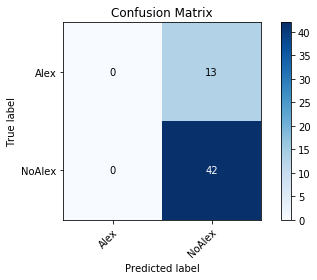

In [73]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(y_test, y_pred, classes=['Alex', 'NoAlex'],
                      title='Confusion Matrix')

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        Alex       0.00      0.00      0.00         0
      NoAlex       1.00      0.76      0.87        55

   micro avg       0.76      0.76      0.76        55
   macro avg       0.50      0.38      0.43        55
weighted avg       1.00      0.76      0.87        55



C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


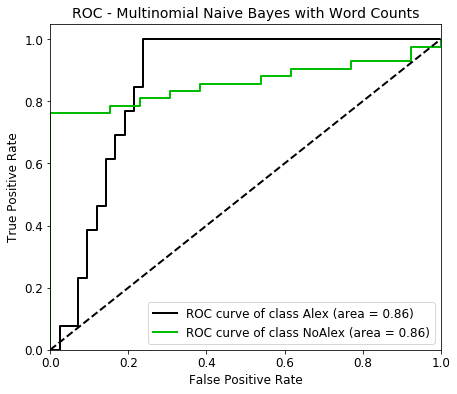

In [75]:
# ROC CURVE PLOT
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, y_probas, title="ROC - Multinomial Naive Bayes with Word Counts",
                      plot_micro=False, plot_macro=False,
                      figsize=(7,6), text_fontsize=12, title_fontsize=14)
plt.show()

## Classifier with Word Counts and Multivariate Bernoulli Naive Bayes
Multivariate Bernoulli works with discrete data (boolean flags), therefore we use here a feature vector with word counts for each document. 
- X: Vector with word counts.
- y: Alexithymia label.

In [76]:
from sklearn.naive_bayes import BernoulliNB

In [77]:
# Bernoulli Naive Bayes using TF/IDF
bern_nb_pipe = Pipeline( steps = [('prepro_ml_pipeline', prepro_ml_pipeline),
                                   ('multinomial_nb', MultinomialNB())])

In [78]:
bern_nb_pipe.fit( X_train, y_train )

Pipeline(memory=None,
     steps=[('prepro_ml_pipeline', FeatureUnion(n_jobs=None,
       transformer_list=[('card_pipeline', Pipeline(memory=None,
     steps=[('categorical_selector', FeatureSelector(feature_names=None)), ('one_hot_encoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy...f_pipeline': 1.0})), ('multinomial_nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [79]:
y_pred = bern_nb_pipe.predict( X_test ) 
y_probas = bern_nb_pipe.predict_proba( X_test ) 

Confusion matrix, without normalization
[[ 0 13]
 [ 0 42]]


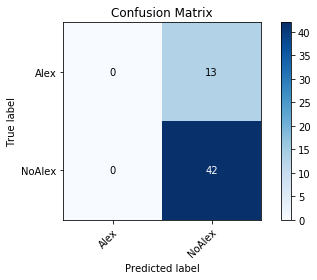

In [80]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(y_test, y_pred, classes=['Alex', 'NoAlex'],
                      title='Confusion Matrix')

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        Alex       0.00      0.00      0.00         0
      NoAlex       1.00      0.76      0.87        55

   micro avg       0.76      0.76      0.76        55
   macro avg       0.50      0.38      0.43        55
weighted avg       1.00      0.76      0.87        55



C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


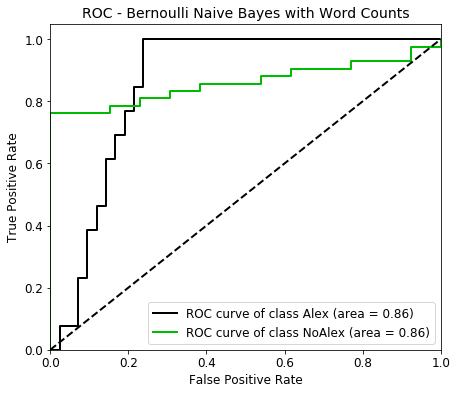

In [82]:
# ROC CURVE PLOT
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, y_probas, title="ROC - Bernoulli Naive Bayes with Word Counts",
                      plot_micro=False, plot_macro=False,
                      figsize=(7,6), text_fontsize=12, title_fontsize=14)
plt.show()

## Classifier with Doc2Vec and Multinomial Naive Bayes
Multinomial Naive Bayes works with ocurrence counts, therefore we use here a feature vector with Term Frequency (TF/IDF) for each document. 
- X: Vector with term frequency and inverse document frequency.
- y: Alexithymia label.

In [83]:
# Multinomial Naive Bayes using Doc2Vec
multi_nb_d2v_pipe = Pipeline( steps = [('prepro_dl_pipeline', prepro_dl_pipeline),
                                       ('multinomial_nb', MultinomialNB())])

In [84]:
multi_nb_d2v_pipe.fit( X_train, y_train )

Pipeline(memory=None,
     steps=[('prepro_dl_pipeline', FeatureUnion(n_jobs=None,
       transformer_list=[('card_pipeline', Pipeline(memory=None,
     steps=[('categorical_selector', FeatureSelector(feature_names=None)), ('one_hot_encoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy...c_pipeline': 1.0})), ('multinomial_nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [85]:
y_pred = multi_nb_d2v_pipe.predict( X_test ) 
y_probas = multi_nb_d2v_pipe.predict_proba( X_test )

Confusion matrix, without normalization
[[ 0 13]
 [ 0 42]]


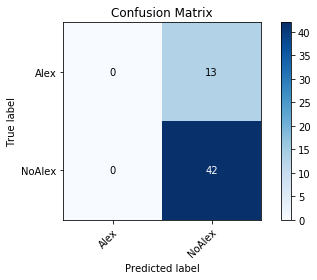

In [86]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(y_test, y_pred, classes=['Alex', 'NoAlex'],
                      title='Confusion Matrix')

In [88]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        Alex       0.00      0.00      0.00         0
      NoAlex       1.00      0.76      0.87        55

   micro avg       0.76      0.76      0.76        55
   macro avg       0.50      0.38      0.43        55
weighted avg       1.00      0.76      0.87        55



C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


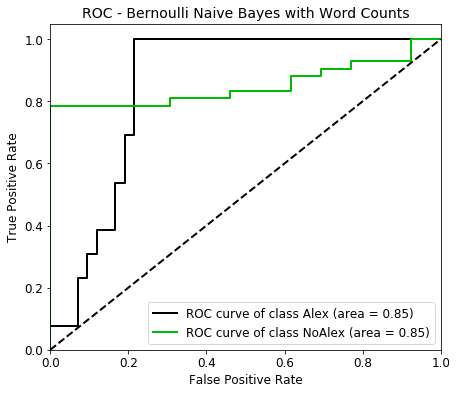

In [89]:
# ROC CURVE PLOT
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, y_probas, title="ROC - Bernoulli Naive Bayes with Word Counts",
                      plot_micro=False, plot_macro=False,
                      figsize=(7,6), text_fontsize=12, title_fontsize=14)
plt.show()

## Classifier with Word Counts and Linear Support Vector Machine
C-Support Vector Classification (SVM) with word counts for each document. 
- X: Vector with word counts.
- y: Alexithymia label.

In [87]:
from sklearn.svm import SVC

In [112]:
# Multinomial Naive Bayes using Doc2Vec
svc_d2v_pipe = Pipeline( steps = [('prepro_dl_pipeline', prepro_dl_pipeline),
                                  ('linear svc', SVC(kernel="linear"))])

In [113]:
svc_d2v_pipe.fit( X_train, y_train )

Pipeline(memory=None,
     steps=[('prepro_dl_pipeline', FeatureUnion(n_jobs=None,
       transformer_list=[('card_pipeline', Pipeline(memory=None,
     steps=[('categorical_selector', FeatureSelector(feature_names=None)), ('one_hot_encoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy...r', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [114]:
y_pred = svc_d2v_pipe.predict( X_test ) 

Confusion matrix, without normalization
[[13  0]
 [10 32]]


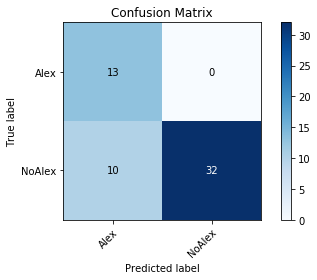

In [115]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(y_test, y_pred, classes=['Alex', 'NoAlex'],
                      title='Confusion Matrix')

In [98]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        Alex       1.00      0.57      0.72        23
      NoAlex       0.76      1.00      0.86        32

   micro avg       0.82      0.82      0.82        55
   macro avg       0.88      0.78      0.79        55
weighted avg       0.86      0.82      0.81        55



In [116]:
# Get probas for SVC predictions
from sklearn.calibration import CalibratedClassifierCV

svm = SVC()
clf = CalibratedClassifierCV(svm)
Xtrainvecs = prepro_dl_pipeline.fit_transform(X_train)
clf.fit(Xtrainvecs, y_train)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

CalibratedClassifierCV(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
            cv='warn', method='sigmoid')

In [117]:
Xtestvecs = prepro_dl_pipeline.transform(X_test)
y_probas = clf.predict_proba(Xtestvecs)

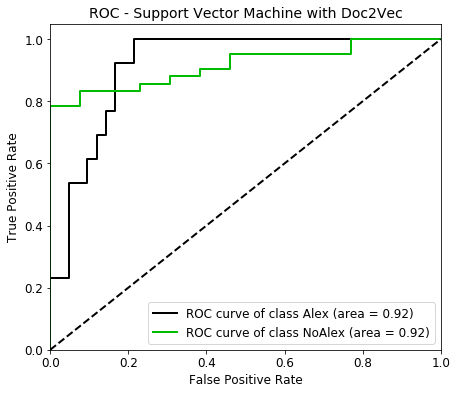

In [118]:
# ROC CURVE PLOT
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, y_probas, title="ROC - Support Vector Machine with Doc2Vec",
                      plot_micro=False, plot_macro=False,
                      figsize=(7,6), text_fontsize=12, title_fontsize=14)
plt.show()

In [121]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [104]:
from sklearn.ensemble import ExtraTreesClassifier

In [105]:
etree_d2v_pipe = Pipeline( steps = [('prepro_dl_pipeline', prepro_dl_pipeline),
                                    ("extra trees", ExtraTreesClassifier(n_estimators=200))])


In [106]:
etree_d2v_pipe.fit( X_train, y_train )

Pipeline(memory=None,
     steps=[('prepro_dl_pipeline', FeatureUnion(n_jobs=None,
       transformer_list=[('card_pipeline', Pipeline(memory=None,
     steps=[('categorical_selector', FeatureSelector(feature_names=None)), ('one_hot_encoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy...tors=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [107]:
y_pred = etree_d2v_pipe.predict( X_test ) 

Confusion matrix, without normalization
[[ 9  4]
 [ 7 35]]


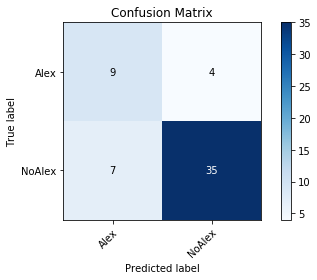

In [108]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(y_test, y_pred, classes=['Alex', 'NoAlex'],
                      title='Confusion Matrix')

In [109]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        Alex       0.69      0.56      0.62        16
      NoAlex       0.83      0.90      0.86        39

   micro avg       0.80      0.80      0.80        55
   macro avg       0.76      0.73      0.74        55
weighted avg       0.79      0.80      0.79        55



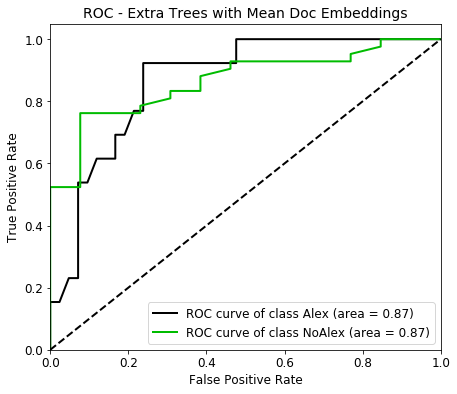

In [111]:
# ROC CURVE PLOT
y_probas = etree_d2v_pipe.predict_proba( X_test )
skplt.metrics.plot_roc(y_test, y_probas, title="ROC - Extra Trees with Mean Doc Embeddings",
                      plot_micro=False, plot_macro=False,
                      figsize=(7,6), text_fontsize=12, title_fontsize=14)
plt.show()